In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("images/image1.jpeg")

In [4]:
img_avg = np.sum(img, axis=2)
img_avg = (1/3)*img_avg

Let's average the values of `BGR` in the image and see what that looks like

In [5]:
print(img_avg.shape)

(1073, 1280)


As you can see it's now just a 2D matrix.

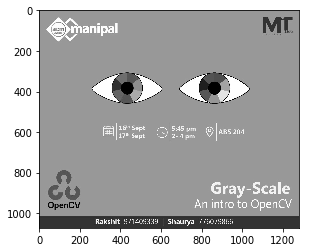

In [6]:
plt.imshow(img_avg, cmap='gray')
plt.show()

There we go! A simple way to make grayscale images. Let's see how this compares to OpenCV's builtin converter

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

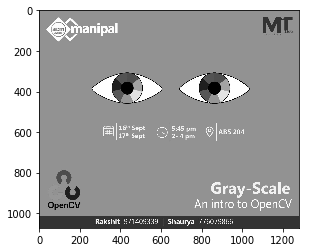

In [8]:
plt.imshow(img_gray, cmap='gray')
plt.show()

Although this isn't apparent straight away, the above two images are not the same. OpenCV's method is a lot more complicated than just averaged the `BGR` values.

But let's try to make our method better than just averaging.

In [9]:
blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,2]

We start off by extracting the individual colour channels of the images. 

Next we use a crazy formula to get the proper grayscale image
$$y_{gray} = 0.299R + 0.587G + 0.114B$$

Which is derived from the principles of photometry to match the luminance of the grayscale image to the luminance of the RGB image

In [10]:
y_gray = 0.299*red + 0.587*green + 0.114*blue

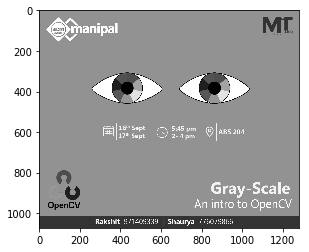

In [11]:
plt.imshow(y_gray, cmap='gray')
plt.show()

As you can see, `y_gray` is much close to `img_gray` than `img_avg`

But to be mathematically sure, you can caluclate the mean squared error between the two

In [12]:
print(np.mean((y_gray-img_gray)**2))
print(np.mean((img_avg-img_gray)**2))

0.0494419316992
62.300857215


As expected `y_gray` is a much better grayscale image then `img_avg`

# Some more pixelwise operations
Say you wanna load an image, and see only the green channel of the image

In [13]:
img = cv2.imread("images/image1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

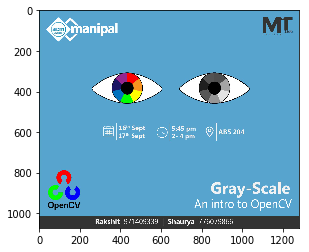

In [14]:
plt.imshow(img)
plt.show()

Let's load and display our `RGB` image, and we get the expected output

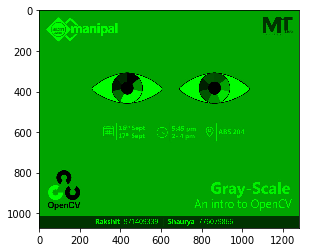

In [15]:
img[:,:,0] = 0
img[:,:,2] = 0
plt.imshow(img)
plt.show()

We set the first and third chanells, that are, `red` and `blue` respectively to zero intensity. The only remaining channel is `green`.


Another common use of pixelwise operations is for increasing or decreasing brightness

In [16]:
img = cv2.imread("images/image1.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Load the same image like before

In [23]:
img += 50.0

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

Running the above code will throw a casting error. So let's fix that first. This also fixes some overflow issues with `uint8`

In [24]:
img_bright = img.astype(float)
img_bright += 50.0

`astype` is used to convert `img` from `uint8` to `float`

Another problem that now arises is that we have some values of `img` exceeding `255`

In [25]:
img_bright = np.clip(img_bright, 0, 255)
img_bright = img_bright.astype('uint8')

We use `clip` to cutoff the values of `img` between `0` to `255`
Then we convert `img` back to `uint8`

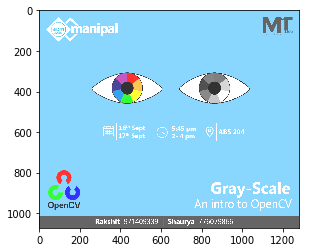

In [26]:
plt.imshow(img_bright)
plt.show()

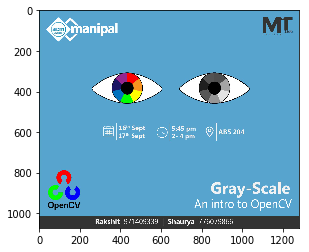

In [30]:
plt.imshow(img)
plt.show()

Instead of adding 50, if we subtracted it, we would've ended up with a darker image.

You can try in below

In [31]:
# YOUR CODE HERE


# Bonus question
How would you increase the contrast on a given image?
Try it below

In [32]:
# YOUR CODE HERE
